In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [19]:
df = pd.read_csv("train.csv")
df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data = np.array(df)
m, n = data.shape
np.random.shuffle(data) 

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [24]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def relu(a):
    return np.maximum(0, a)

def relu_deriv(A):
    return A > 0

def sftmax(b):
    b_stable = b - np.max(b, axis=-1, keepdims=True)
    exp_b = np.exp(b_stable)
    return exp_b / np.sum(exp_b, axis=-1, keepdims=True)

def fwd_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = sftmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def bwd_prop(Z1, A1, Z2, A2, Y, W2, X):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m*(dZ2.dot(A1.T))
    db2 = 1/m*(np.sum(dZ2))
    dZ1 = (W2.T.dot(dZ2)) * relu_deriv(Z1)
    dW1 = 1/m*(dZ1.dot(X.T))
    db1 = 1/m*(np.sum(dZ1))
    return dW1, db1, dW2, db2

def update_params(dW1, db1, dW2, db2, alpha, W1, b1, W2, b2):
    W1 = W1 - (alpha*dW1)
    b1 = b1 - (alpha*db1)
    W2 = W2 - (alpha*dW2)
    b2 = b2 - (alpha*db2)
    return W1,b1,W2,b2

In [28]:
def get_pred(A2):
    return np.argmax(A2, 0)

def get_acc(preds, Y):
    print(preds, Y)
    return np.sum(preds == Y) / Y.size

def grad_desc(X, Y, iter, alpha):
    W1, b1, W2, b2 = init_params()
    for _ in range(iter):
        Z1, A1, Z2, A2 = fwd_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = bwd_prop(Z1, A1, Z2, A2, Y, W2, X)
        W1, b1, W2, b2 = update_params(dW1, db1, dW2, db2, alpha, W1, b1, W2, b2)
        if _%50 == 0:
            print('Iteration: ', _)
            print("Accuracy: ", get_acc(get_pred(A2),Y))
    return W1, b1, W2, b2


In [30]:
W1, b1, W2, b2 = grad_desc(X_train, Y_train, 500, 0.1)

Iteration:  0
[7 7 1 ... 1 7 6] [9 3 1 ... 8 6 6]
Accuracy:  0.13829268292682928
Iteration:  50
[7 0 1 ... 0 0 0] [9 3 1 ... 8 6 6]
Accuracy:  0.2673658536585366
Iteration:  100
[7 3 1 ... 3 0 0] [9 3 1 ... 8 6 6]
Accuracy:  0.5285365853658537
Iteration:  150
[9 3 1 ... 8 2 6] [9 3 1 ... 8 6 6]
Accuracy:  0.780609756097561
Iteration:  200
[9 3 1 ... 3 2 6] [9 3 1 ... 8 6 6]
Accuracy:  0.8238780487804878
Iteration:  250
[9 3 1 ... 3 2 6] [9 3 1 ... 8 6 6]
Accuracy:  0.8443658536585366
Iteration:  300
[9 3 1 ... 3 2 6] [9 3 1 ... 8 6 6]
Accuracy:  0.8591707317073171
Iteration:  350
[9 3 1 ... 3 6 6] [9 3 1 ... 8 6 6]
Accuracy:  0.8693170731707317
Iteration:  400
[9 3 1 ... 3 6 6] [9 3 1 ... 8 6 6]
Accuracy:  0.8780975609756098
Iteration:  450
[9 3 1 ... 3 6 6] [9 3 1 ... 8 6 6]
Accuracy:  0.8847073170731707


In [31]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = fwd_prop(W1, b1, W2, b2, X)
    predictions = get_pred(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


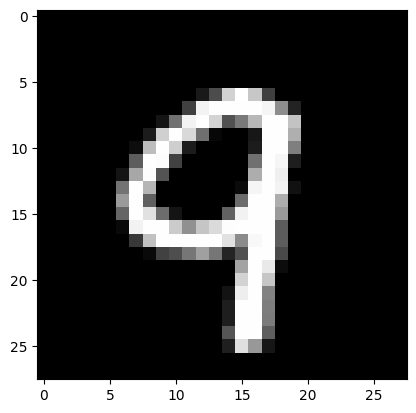

Prediction:  [3]
Label:  3


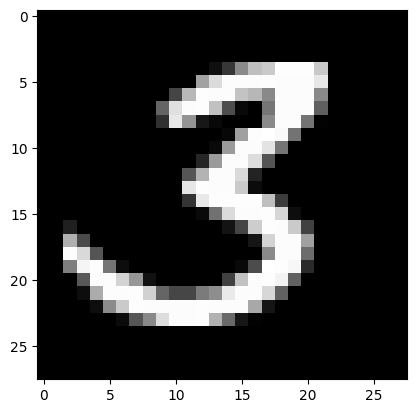

Prediction:  [1]
Label:  1


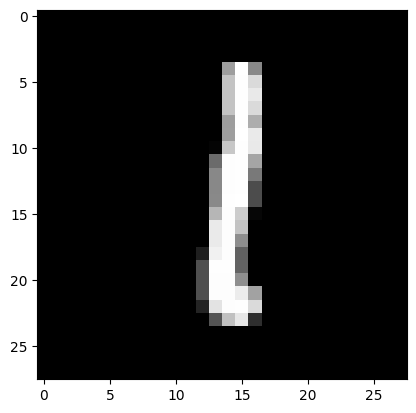

Prediction:  [7]
Label:  7


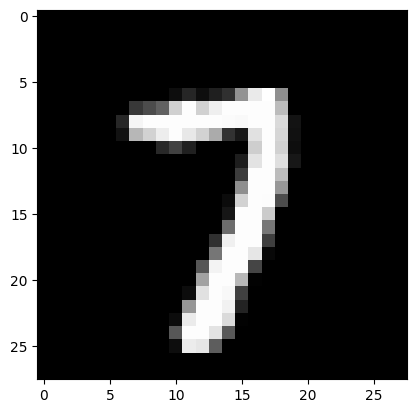

In [32]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)